In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df = pd.read_csv('DATASET.csv')
df = df.loc[:,'Y':]
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,250.028002,2.259040,2.574593,0.244896,3.560796,0.971065,3.712433,6.693386,7.294241,6.775859,1.031018,5.300665,8.242376
1,678.888937,NaN,NaN,0.237463,3.873569,0.966822,15.396145,6.322863,4.200354,1.160037,10.925502,10.729831,9.848330
2,277.568685,7.623441,1.582376,0.315214,3.546027,0.985277,NaN,6.216856,2.772142,8.089286,6.510399,6.584904,7.365182
3,220.862475,5.342857,1.426692,0.200689,NaN,0.996164,0.837462,7.380251,4.136386,NaN,3.406960,8.647871,7.744706
4,270.135897,6.488599,1.815623,0.135108,2.859454,0.985726,5.247850,7.326680,6.517110,7.409005,0.876959,4.583116,6.027048


In [3]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th", props=[("font-size", "7pt")]),
            dict(selector="td", props=[('padding', "0em 0em")]),
            dict(selector="th:hover", props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover", props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

df.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
Y,1,0.087,0.031,-0.001,0.062,0.062,0.6,0.15,-0.00083,0.097,0.037,0.49,0.12
X1,0.087,1,-0.038,0.019,0.0046,0.038,-0.023,0.076,-0.0071,-0.011,0.019,0.029,0.022
X2,0.031,-0.038,1,0.016,0.062,0.0073,-0.035,0.025,0.042,0.031,0.0036,-0.0067,0.021
X3,-0.001,0.019,0.016,1,0.00039,0.031,-0.031,-0.052,-0.024,-0.041,0.027,0.014,0.036
X4,0.062,0.0046,0.062,0.00039,1,0.029,0.059,0.043,0.04,0.018,0.014,0.04,0.0086
X5,0.062,0.038,0.0073,0.031,0.029,1,-0.019,0.076,-0.04,0.032,-0.019,0.035,-0.035
X6,0.6,-0.023,-0.035,-0.031,0.059,-0.019,1,0.035,-0.0099,-0.027,-0.014,0.02,0.047
X7,0.15,0.076,0.025,-0.052,0.043,0.076,0.035,1,-0.04,-0.0067,-0.0068,-0.011,0.022
X8,-0.00083,-0.0071,0.042,-0.024,0.04,-0.04,-0.0099,-0.04,1,0.023,-0.0036,-0.0056,-0.052
X9,0.097,-0.011,0.031,-0.041,0.018,0.032,-0.027,-0.0067,0.023,1,-0.0012,0.051,-0.034


In [4]:
df = df.fillna(df.mean())

# PART- I

In [5]:
df.to_csv('g-XX-w.csv')

In [6]:
X = df.loc[:, 'X1':]
Y = df.loc[:, 'Y']
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,df['Y'],random_state=0,test_size=0.2)

# Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()
regression.fit(X_train,Y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
linear_model=(mean_squared_error(y_true=Y_test,y_pred=regression.predict(X_test)))
print(linear_model)

51792.650136270204


In [8]:
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,df.iloc[:,1:].columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'X1': 28.94210673311596,
 'X2': 15.66320560354555,
 'X3': -4.342754752258969,
 'X4': -6.707324423744153,
 'X5': 18.897883522450805,
 'X6': 210.56599684456958,
 'X7': 48.33908244158182,
 'X8': 14.307353365437079,
 'X9': 27.596650418304392,
 'X10': 14.564304257964757,
 'X11': 175.0184579064749,
 'X12': 34.54308015960345}

In [9]:
lm_predictions = regression.predict(X_test)
d = {'true' : list(Y_test), 'predicted' : pd.Series(lm_predictions)}
pd.DataFrame(d).head()

,true,predicted
0,451.528431,646.534062
1,1012.845566,377.637558
2,2297.893471,1112.653985
3,181.621461,359.419927
4,583.458087,800.348842


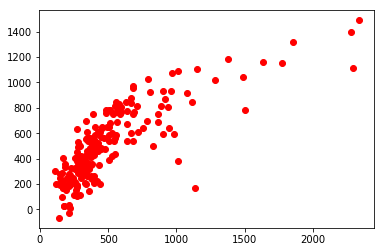

In [10]:
from matplotlib import pyplot as plt
# Create linear regression object and Train the model using the training sets
lm = LinearRegression().fit(X_train, Y_train)
 
# Plot outputs
plt.scatter(Y_test, lm.predict(X_test), color='red')


In [11]:
#Handling Outliers 
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

train ,test = train_test_split(df,test_size=0.3,random_state = 123 ) 
train=train.apply(lambda x: outlier_capping(x))
test=test.apply(lambda x: outlier_capping(x))

In [12]:
import statsmodels.formula.api as smf
lm=smf.ols('Y~X1+X5+X6+X7+X9+X11+X12', train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     137.5
Date:                Fri, 19 Apr 2019   Prob (F-statistic):          1.84e-126
Time:                        11:58:21   Log-Likelihood:                -4722.0
No. Observations:                 700   AIC:                             9460.
Df Residuals:                     692   BIC:                             9496.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2204.9540    702.018     -3.141      0.0

# Decision Tree

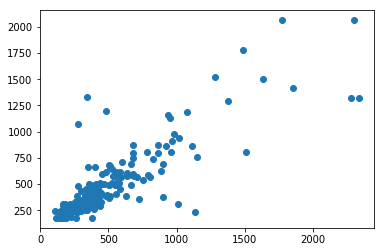

In [13]:
from sklearn.tree import DecisionTreeRegressor
dtree_model = DecisionTreeRegressor(max_depth = 12).fit(X_train, Y_train)

dtree_predictions = dtree_model.predict(X_test)
d = {'true' : list(Y_test), 'predicted' : pd.Series(dtree_predictions)}
pd.DataFrame(d).head(10)

plt.scatter(list(Y_test),pd.Series(dtree_predictions))

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(Y_test, dtree_predictions))
rmse

207.18518030937076

# Lasso

In [16]:
from sklearn.linear_model import Lasso
lasso=Lasso(normalize=True)
search=GridSearchCV(estimator=lasso,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [17]:
search.best_params_

{'alpha': 0.01}

In [18]:
abs(search.best_score_)

64362.20248988424

In [19]:
lasso=Lasso(normalize=True,alpha=0.01)
lasso.fit(X_train,Y_train)
lasso_model=(mean_squared_error(y_true=Y_test,y_pred=lasso.predict(X_test)))
print(lasso_model)

51735.90057412621


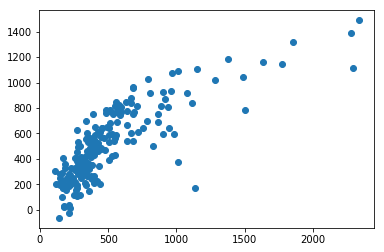

In [18]:
plt.scatter(Y_test,lasso.predict(X_test))

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(Y_test, lasso.predict(X_test)))
rmse

227.45527159010012

In [19]:
coef_dict_baseline = {}
for coef, feat in zip(lasso.coef_,df.iloc[:,1:].columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'X1': 28.683709391548952,
 'X2': 15.36752182718226,
 'X3': -4.053309885991434,
 'X4': -6.331833787336073,
 'X5': 18.60585917393395,
 'X6': 210.24411666914668,
 'X7': 48.111871970412714,
 'X8': 14.020440450894505,
 'X9': 27.318737607932167,
 'X10': 14.259334503837314,
 'X11': 174.77700387280973,
 'X12': 34.23400130125464}

# Random Forest

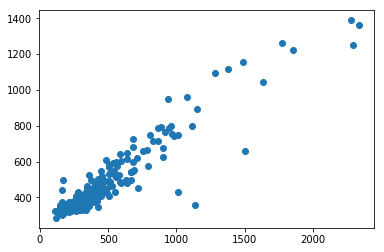

In [20]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_features = 0.2, max_depth = 9, n_estimators = 1000, random_state = 123)

model_rf = rfr.fit(X_train, Y_train)
rf_predictions = model_rf.predict(X_test)
plt.scatter(Y_test,rf_predictions)

# PART-II

In [21]:
df = pd.read_csv('g-XX-w.csv')
df = df.loc[:,'Y':]
df = df.fillna(df.mean())
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,250.028002,2.259040,2.574593,0.244896,3.560796,0.971065,3.712433,6.693386,7.294241,6.775859,1.031018,5.300665,8.242376
1,678.888937,4.443032,2.975741,0.237463,3.873569,0.966822,15.396145,6.322863,4.200354,1.160037,10.925502,10.729831,9.848330
2,277.568685,7.623441,1.582376,0.315214,3.546027,0.985277,8.222754,6.216856,2.772142,8.089286,6.510399,6.584904,7.365182
3,220.862475,5.342857,1.426692,0.200689,3.693456,0.996164,0.837462,7.380251,4.136386,6.850414,3.406960,8.647871,7.744706
4,270.135897,6.488599,1.815623,0.135108,2.859454,0.985726,5.247850,7.326680,6.517110,7.409005,0.876959,4.583116,6.027048


In [22]:
# discretizing Y
Yrange = df['Y'].max() - df['Y'].min()

df['Y'] = np.where((df['Y'] < Yrange/5),1,
              np.where((df['Y'] >= Yrange/5) & (df['Y'] < Yrange*2/5),2,
                 np.where((df['Y'] >= Yrange*2/5) & (df['Y'] < Yrange*3/5),3,
                    np.where((df['Y'] >= Yrange*3/5) & (df['Y'] < Yrange*4/5),4,5))))

# discretizing X6
X6range = df['X6'].max() - df['X6'].min()

df['X6'] = np.where((df['X6'] < X6range/5),1,
              np.where((df['X6'] >= X6range/5) & (df['X6'] < X6range*2/5),2,
                 np.where((df['X6'] >= X6range*2/5) & (df['X6'] < X6range*3/5),3,
                    np.where((df['X6'] >= X6range*3/5) & (df['X6'] < X6range*4/5),4,5))))

# discretizing X11
X11range = df['X11'].max() - df['X11'].min()

df['X11'] = np.where((df['X11'] < X11range/3),1,
              np.where((df['X11'] >= X11range/3) & (df['X11'] < X11range*2/3),2,3))

df.to_csv('g-XX-w2.csv', index=False)
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,1,2.259040,2.574593,0.244896,3.560796,0.971065,1,6.693386,7.294241,6.775859,1.031018,1,8.242376
1,1,4.443032,2.975741,0.237463,3.873569,0.966822,3,6.322863,4.200354,1.160037,10.925502,2,9.848330
2,1,7.623441,1.582376,0.315214,3.546027,0.985277,2,6.216856,2.772142,8.089286,6.510399,1,7.365182
3,1,5.342857,1.426692,0.200689,3.693456,0.996164,1,7.380251,4.136386,6.850414,3.406960,2,7.744706
4,1,6.488599,1.815623,0.135108,2.859454,0.985726,1,7.326680,6.517110,7.409005,0.876959,1,6.027048


In [23]:
X = df.loc[:, 'X1':]
Y = df.loc[:, 'Y']
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,df['Y'],random_state=0,test_size=0.2)

/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7).fit(X_train, Y_train)

knn_predictions = knn_model.predict(X_test)
print(' KNN accuracy: ',accuracy_score(Y_test, knn_predictions)*100,'%')
cm = confusion_matrix(Y_test, knn_predictions)
cm

 KNN accuracy:  84.5 %


array([[167,   2,   0,   0],
       [ 23,   2,   0,   0],
       [  4,   1,   0,   0],
       [  0,   1,   0,   0]])

# SVM

In [25]:
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear', C=1).fit(X_train, Y_train)

svm_predictions = svm_model.predict(X_test)
print(' SVM accuracy: ',accuracy_score(Y_test, svm_predictions)*100,'%')
cm = confusion_matrix(Y_test, svm_predictions)
cm

 SVM accuracy:  89.0 %


array([[165,   4,   0,   0],
       [ 11,  13,   0,   1],
       [  0,   5,   0,   0],
       [  0,   1,   0,   0]])

# Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB().fit(X_train, Y_train)

nb_predictions = nb_model.predict(X_test)
print('NB accuracy: ',accuracy_score(Y_test, nb_predictions)*100,'%')
cm = confusion_matrix(Y_test, nb_predictions)
cm

NB accuracy:  90.5 %


array([[167,   2,   0,   0],
       [ 10,  14,   1,   0],
       [  0,   5,   0,   0],
       [  0,   1,   0,   0]])

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features = 0.2, max_depth = 9, n_estimators = 1000, random_state = 123)

model_rf = rfc.fit(X_train, Y_train)
rf_predictions = model_rf.predict(X_test)
print('RF accuracy: ',accuracy_score(Y_test, rf_predictions)*100,'%')
cm = confusion_matrix(Y_test, rf_predictions)
cm

RF accuracy:  91.5 %


array([[168,   1,   0,   0],
       [ 11,  14,   0,   0],
       [  0,   4,   1,   0],
       [  0,   1,   0,   0]])

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, Y_train)

dtree_predictions = dtree_model.predict(X_test)
print(' Decision Tree accuracy: ',accuracy_score(Y_test, dtree_predictions)*100,'%')
cm = confusion_matrix(Y_test, dtree_predictions)
cm

 Decision Tree accuracy:  93.5 %


array([[168,   1,   0,   0],
       [  9,  16,   0,   0],
       [  0,   2,   3,   0],
       [  0,   1,   0,   0]])

# Decision tree gives the best accuracy among all models

In [29]:
model_dt = dtree_model.fit(X_train, Y_train)

# predictions
y_pred_dt = model_dt.predict(X_test)

d = {'true' : list(Y_test), 'predicted' : pd.Series(y_pred_dt)}

pd.DataFrame(d).head()

,true,predicted
0,1,1
1,2,1
2,3,3
3,1,1
4,1,1
